In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

In [25]:
n_samples = 100
centers = [(-5, -5), (0, 0), (5, 5)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

In [32]:
class Kmeans():
    """K-means clustering algorithm class with sklearn like API
    with fit,predict and plot functions implemented till now
    
    Parameters:
    ----------
    n_clusters: Number of expected clusters
    init: Method for initialization of clusters
          random: random data points will be choosen as clusters
          if an ndarray is passed then it should be of shape(n_clusters,
          n_features) which will give initial centroids
    max_iter: maximum number of iterations
    random_state: used to decide initial random centroids
    
    """
    
    def __init__(self,n_clusters=3,init='random',max_iter = 300,
                 random_state = 69):
        
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        
        if isinstance(init, np.ndarray):
            self.centroids = init
        else:
            self.centroids = None
            
    def fit(self, X):
        
        assert(isinstance(X,np.ndarray)) # check ndarray
        assert(len(X.shape)==2)          # check 2-D
        assert(X.shape[0]+1>self.n_clusters) # check number of clusters is less than points in dataset
        self.X = X
        self.n = X.shape[0]
        self.d = X.shape[1]
        
        np.random.seed(self.random_state)
        if self.centroids is not None:
            assert(self.centroids.shape[0]==self.n_clusters)
            assert(self.centroids.shape[1]==self.d)
        else:
            centroid_indices = np.random.choice(self.n,self.n_clusters)
            self.centroids = self.X[centroid_indices]
        
        # To calculate euclidean distance between every point and centroid
        # we'll have to loop but it can be done in an efficient vectorised
        # way. We stack the data points along the depth giving us a tensor
        # of shape (nxdxk)
        X_stack = np.stack([self.X]*self.n_clusters,axis=-1)
        row_index = np.arange(self.n)
        zero_stack = np.zeros([1,1,2])
        
        for i in range(self.max_iter):
            
            # Now calculate distances in one go by taking vector difference
            # of each point with each centroid. Here, broadcasting principle
            # apply. ||(nxdxk) - [(dxk)-->(1xdxk)] ||^2
            distances = np.linalg.norm(X_stack-self.centroids.T,axis=1)
            labels = np.argmin(distances,axis=1)
            # Now we've to find out how many data points are assigned
            # to each cluster. Again, we'll do it in vectorised fashion
            # we assign data point value to nth row and kth column
            # where n is data point index and k is label assigned to it
            # for obtaining sum of data points assigned to a particular
            # cluster. we aggregrate along cluster axis.
            sparse = np.zeros([self.n,self.n_clusters,self.d])
            sparse[row_index,labels] = self.X
            
            label_count = (sparse!=zero_stack).sum(axis=0)
            
            self.centroids = (sparse.sum(axis=0)+1)/(label_count+1)
            
        self.labels = labels
        
        return self
        
        
    def predict(self,X):
        
        assert(isinstance(X,np.ndarray))
        assert(len(X.shape)==2)
        
        X_stack = np.stack([X]*self.n_clusters,axis=-1)
        
        distances = np.linalg.norm(X_stack-self.centroids.T,axis=1)
        labels = np.argmin(distances,axis=1)
        
        return labels
    
    def plot_clusters(self,y=None):
        
        plt.scatter(x=self.X[:,0],y=self.X[:,1],c=np.sort(self.labels))
        plt.title("Result of K-means with {} clusers".format(self.n_clusters))
        plt.show()
        if y is not None:
            plt.scatter(x=self.X[:,0],y=self.X[:,1],c=np.sort(y))
            plt.title("Original Data with {} clusers".format(self.n_clusters))
            plt.show()

In [30]:
kmeans = Kmeans().fit(X)

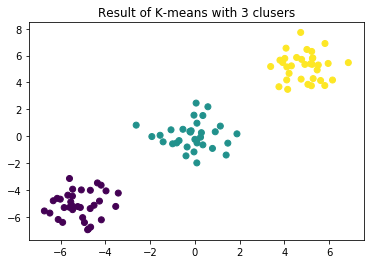

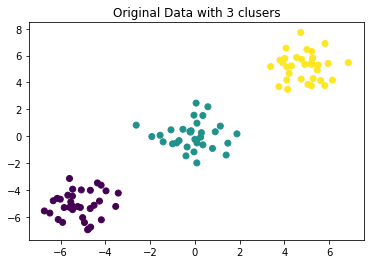

In [31]:
kmeans.plot_clusters(y)